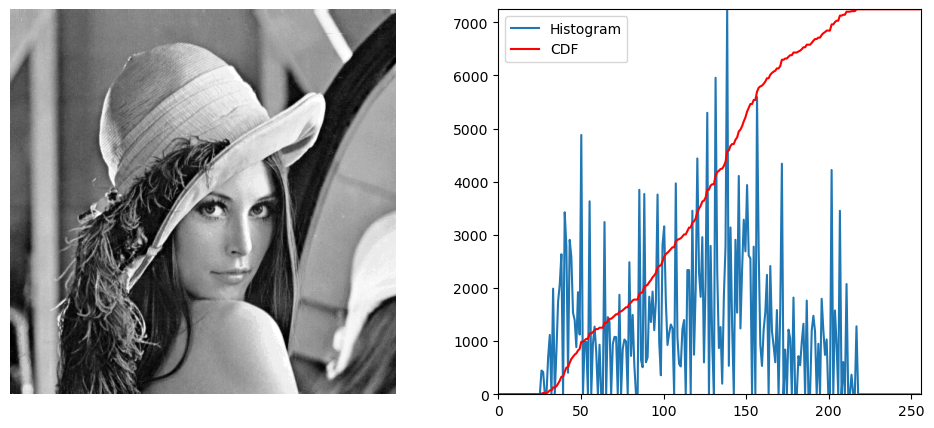

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_image(path):
    return cv2.imread(path, cv2.IMREAD_GRAYSCALE)

def plot_image_and_histogram(image, hist_range=(0, 256), cdf_range=(0, 1)):
    bins = np.linspace(hist_range[0], hist_range[1], 256)  # Adjust bins to match range
    hist, _ = np.histogram(image.flatten(), bins=bins)
    cdf = hist.cumsum()
    cdf_normalized = cdf / cdf.max()

    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    axs[0].imshow(image, cmap='gray')
    axs[0].axis("off")

    axs[1].plot(bins[:-1], hist, label="Histogram")
    axs[1].plot(bins[:-1], cdf_normalized * hist.max(), label="CDF", color='r')
    axs[1].set_xlim(hist_range)
    axs[1].set_ylim(0, hist.max())
    axs[1].legend()

    plt.show()

image = load_image("data/lenna.png")
plot_image_and_histogram(image)

## Exercise 1: 
Normalize image to range of [0, 1].

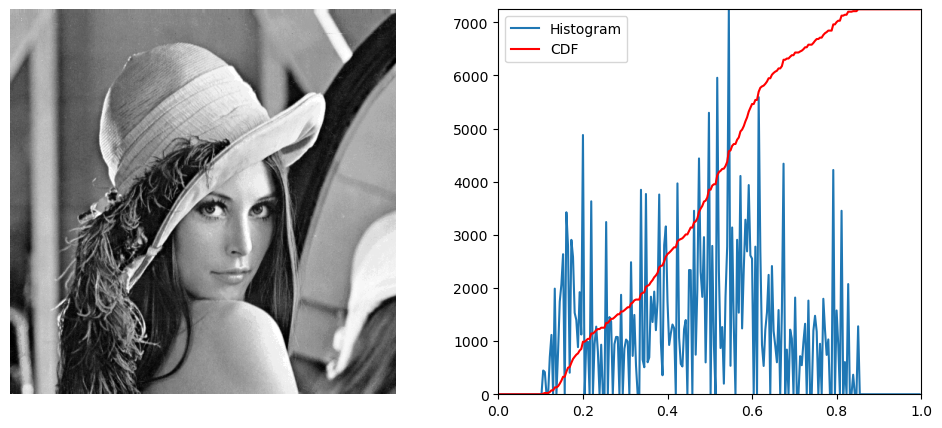

In [4]:
def normalize_image(image):
    return image.astype(np.float32) / 255.0

normalized_image = normalize_image(image)
plot_image_and_histogram(normalized_image, (0, 1))

## Exercise 2:

Given image $ I $.

Compute $ G_x $ and $ G_y $ using Sobel, Prewitt and Robert filters, visualize results.

Find the Direction and Magnitude of the gradient, visualize results.

Choose a suitable threshold $ \tau $ to modify $ I $ in this manner:

- If $ I(x, y) \geq \tau $ then $ I^{'}(x, y) = 1 $.
- Otherwise $ I^{'}(x, y) = 0 $.

Visualize results.

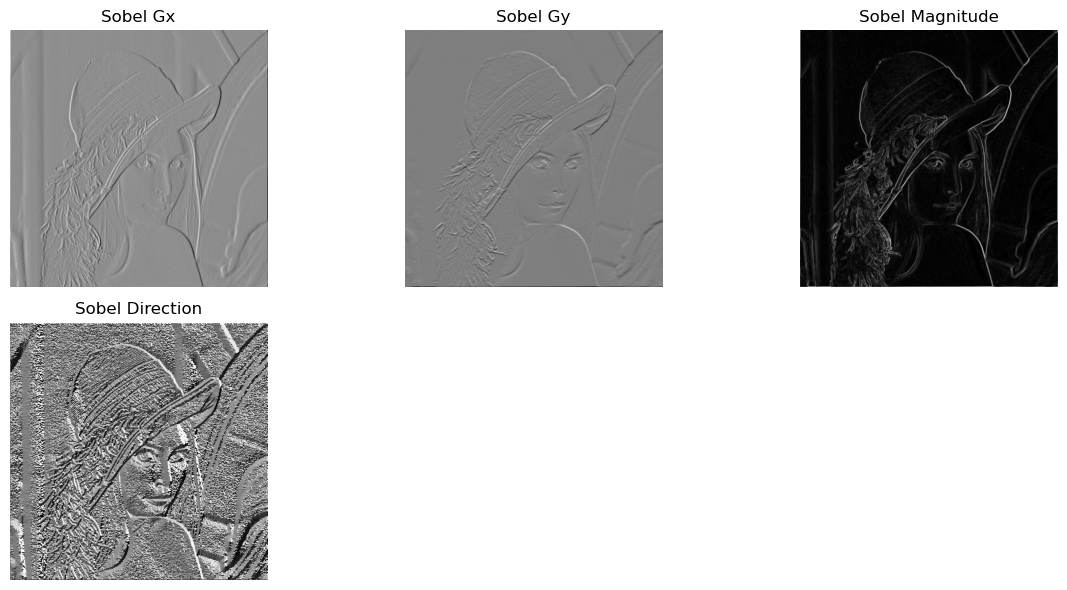

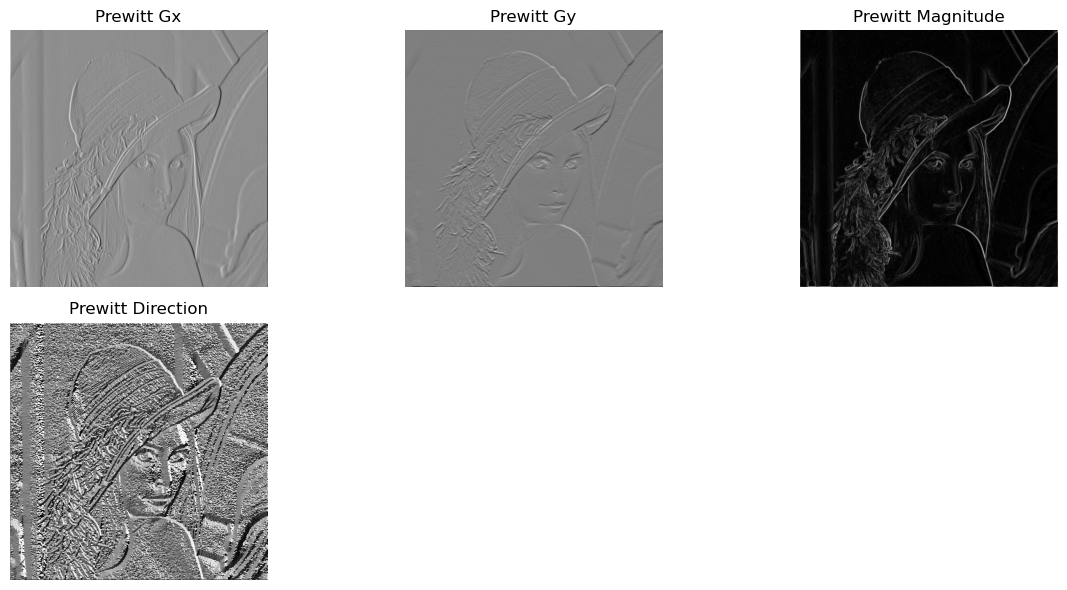

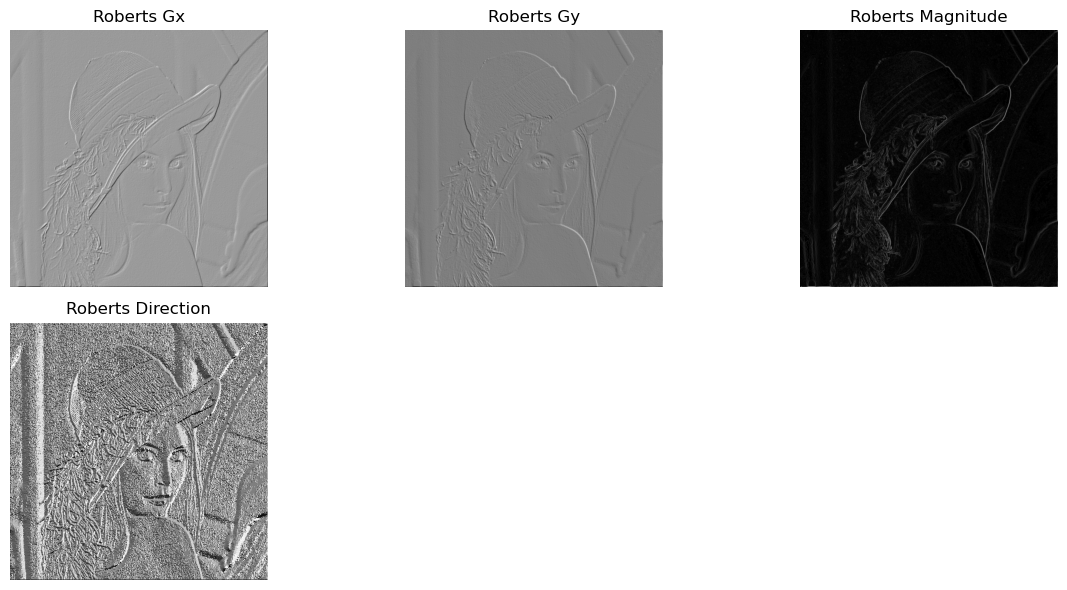

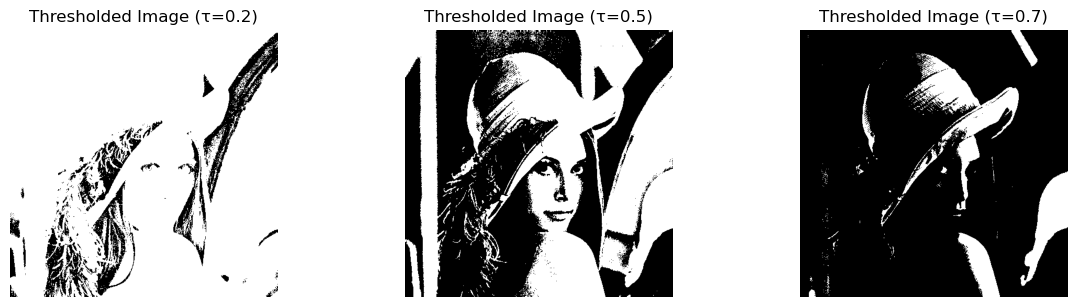

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import sobel, prewitt, convolve

def compute_gradients(image, method='sobel'):
    if method == 'sobel':
        Gx = sobel(image, axis=1, mode='constant')
        Gy = sobel(image, axis=0, mode='constant')
    elif method == 'prewitt':
        Gx = prewitt(image, axis=1, mode='constant')
        Gy = prewitt(image, axis=0, mode='constant')
    elif method == 'roberts':
        roberts_x = np.array([[1, 0], [0, -1]])
        roberts_y = np.array([[0, 1], [-1, 0]])
        Gx = convolve(image, roberts_x, mode='constant')
        Gy = convolve(image, roberts_y, mode='constant')
    else:
        raise ValueError("Unknown method")
    return Gx, Gy

def compute_magnitude_direction(Gx, Gy):
    magnitude = np.sqrt(Gx**2 + Gy**2)
    direction = np.arctan2(Gy, Gx)
    return magnitude, direction

def threshold_image(image, tau=0.5):
    binary_image = np.where(image >= tau, 1, 0)
    return binary_image

def plot_results(images, titles, cmap='gray'):
    plt.figure(figsize=(12, 6))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(2, 3, i+1)
        plt.imshow(img, cmap=cmap)
        plt.title(title)
        plt.axis("off")
    plt.tight_layout()
    plt.show()

methods = ['sobel', 'prewitt', 'roberts']
gradients = {method: compute_gradients(normalized_image, method) for method in methods}
magnitudes_directions = {method: compute_magnitude_direction(*gradients[method]) for method in methods}

taus = [0.2, 0.5, 0.7]
binary_images = [threshold_image(normalized_image, tau) for tau in taus]

for method in methods:
    Gx, Gy = gradients[method]
    magnitude, direction = magnitudes_directions[method]
    plot_results([Gx, Gy, magnitude, direction], 
                 [f'{method.capitalize()} Gx', f'{method.capitalize()} Gy', 
                  f'{method.capitalize()} Magnitude', f'{method.capitalize()} Direction'])

plot_results(binary_images, [f"Thresholded Image (τ={tau})" for tau in taus], cmap='gray')

## Exercise 3:

- Perform **Canny Edge Detection** following these steps:
    - Denoise image using Gaussian kernel, size $ 5 \times 5 $.
    - Use `cv2.Canny()` and visualize results.

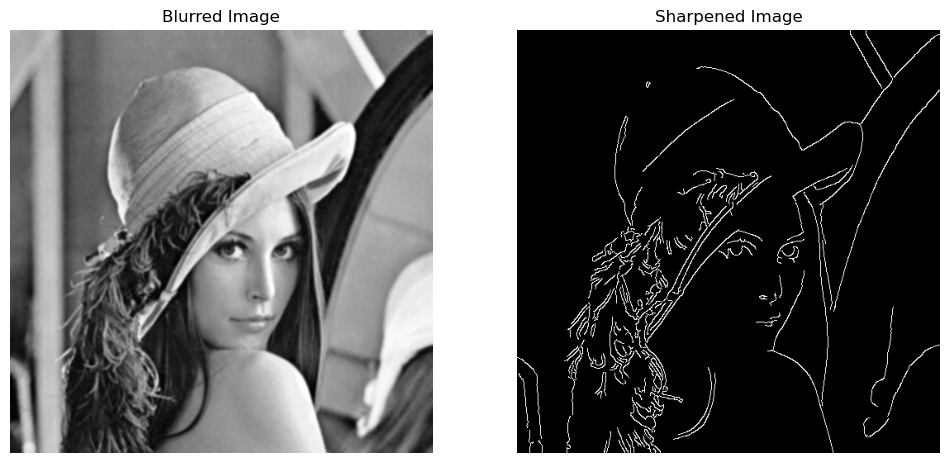

In [12]:
blurred_image = cv2.GaussianBlur((normalized_image * 255).astype(np.uint8), (5, 5), 0)
canny_edges = cv2.Canny(blurred_image, 100, 200)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(blurred_image, cmap='gray')
plt.title("Blurred Image")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(canny_edges, cmap='gray')
plt.title("Sharpened Image")
plt.axis("off")
plt.show()

## Exercise 4:

- Perform **Image Sharpnening** following these steps:
    - Convolution with Average kernel, size $ 5 \times 5 $.
    - Apply **Image Sharpening**, visualize results.

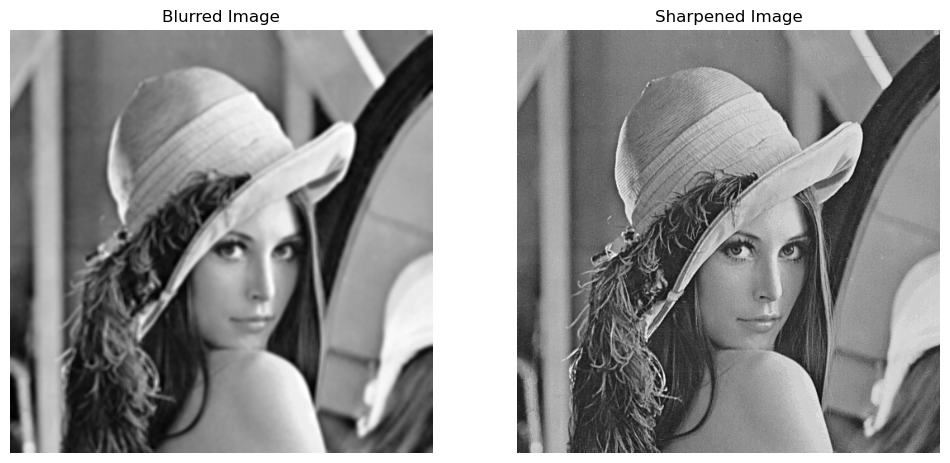

In [11]:
average_kernel = np.ones((5, 5), np.float32) / 25
blurred = cv2.filter2D(normalized_image, -1, average_kernel)
sharpened = cv2.addWeighted(normalized_image, 1.5, blurred, -0.5, 0)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(blurred, cmap='gray')
plt.title("Blurred Image")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(sharpened, cmap='gray')
plt.title("Sharpened Image")
plt.axis("off")
plt.show()